In [22]:
import numpy as np
import math as math
from matplotlib import pyplot as plt 
import random
from sympy import *
from numpy.linalg import inv

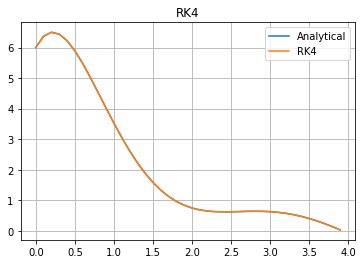

In [36]:
def F(t):
  F = np.array([0.0, 0.0])
  F[0] = F0 * np.sin(t)
  return F

def G(y, t):
  return inv(A).dot(F(t) - B.dot(y))

def RK4(t, y, dt):
  s1 = G(y, t)
  s2 = G(y + (0.5 * s1) * dt, t + 0.5 * dt)
  s3 = G(y + (0.5 * s2) * dt, t + 0.5 * dt)
  s4 = G(y + s3 * dt, t + dt)

  return dt * (s1 + 2*s2 + 2*s3 + s4) / 6   # This is the better slope

def part1_analytical (time_step):
  a = 7 * (math.exp(-time_step)) * (math.cos(sqrt(2) * time_step))
  b = (11 / sqrt(2)) * (math.exp(-time_step)) * (math.sin(sqrt(2) * time_step))
  a + b - (math.cos(time_step)) + (math.sin(time_step))
  return a + b - (math.cos(time_step)) + (math.sin(time_step))

# ODE setup
m = 1.0
c = 2.0
k = 3.0

F0 = 4.0
delta_t = 0.1
time_range = 4
iterations = int(time_range/delta_t)
time = np.arange (0.0, time_range, delta_t)

# Initial conditions
y = np.array ([5.0, 6.0]) # [Velocity, Displacement]

A = np.array([[m,0], [0,1]])
B = np.array([[c,k], [-1,0]])

Y = []
force = []
abs_error = np.zeros(iterations)
analytical = []
i = 0
# Time-stepping solution
for t in time:
  
  analytical.append(part1_analytical(t))
  error = abs(y[1] - part1_analytical(t))
  abs_error[i]=(error) 
  i += 1
  Y.append(y[1])
  y = y + RK4(t, y, delta_t)

  force.append(F(t)[0])

# Plot
plt.plot(time, analytical)
plt.plot(time, Y)
plt.title("RK4")
#plt.plot(time, force)
plt.grid(true)
plt.legend(['Analytical', 'RK4'], loc = 'upper right')

plt.show()


RMSD RK4 Error =  7.93288376137758e-10


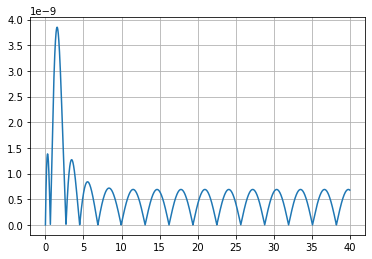

In [ ]:
plt.plot(time, abs_error)
plt.grid(true)

rmsd_squared = (np.sum(np.square(abs_error))) / (time_range / delta_t)
rmsd = sqrt(rmsd_squared)

print("RMSD RK4 Error = ", rmsd)

plt.show()

In [37]:
def yn_1_prime_func (tn, yn_prime, yn, time_step):
  a = 4*(np.sin(tn))
  b = 2*yn_prime
  c = 3*yn

  yn_1_new = yn_prime + ((a-b-c)*time_step)
  return yn_1_new

def part1_analytical (time_step):
  a = 7 * (math.exp(-time_step)) * (math.cos(sqrt(2) * time_step))
  b = (11 / sqrt(2)) * (math.exp(-time_step)) * (math.sin(sqrt(2) * time_step))
  equate = a + b - (math.cos(time_step)) + (math.sin(time_step))
  return equate


def newton (y0,ynprime,time_step,xguess,tn):
  a = (xguess-y0)/time_step
  b = 4*(math.sin(tn))
  c = 2*((xguess-y0)/time_step)
  d = 3*xguess
  equate = (a - ynprime - (time_step*(b-c-d)))
  output = xguess -(equate/( (1/time_step) +2 + (3*time_step)))
  return output

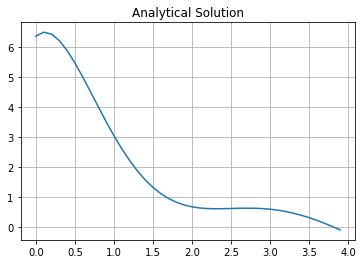

In [38]:
time_step = 0.1
y0 = 6
ynprime = 5
xguess = 1
xnew = xguess*3
tn = time_step
iterations = 40
tolerance = 0.00001
time1 = np.arange(0.0, (time_step*iterations), time_step)
back_results = np.zeros((iterations,2))
anal_results = np.zeros(iterations)
error_part2 = np.zeros(iterations)
for i in range(iterations):
  while abs(xguess-xnew) >= tolerance:
    #print (xguess, xnew)
    xguess = xnew
    xnew = newton(y0,ynprime,time_step,xguess,tn)

  #print (xguess, xnew, tn)
  anal_results[i] = part1_analytical(tn)
  back_results[i,:] = np.array([xnew,tn])

  error_part2[i] = abs(anal_results[i] - back_results[i,0])

  tn = tn + time_step
  ynprime = (xnew - y0)/time_step
  y0 = xnew
  xguess = random.randint(3,7)
  xnew = xguess*2
  #print ("end of iteration \n")

#print (back_results)
plt.plot(time1,anal_results)
#plt.plot(time1,back_results[:,0])
plt.title("Analytical Solution")
plt.grid(True)
#plt.legend(['Analytical', 'Backward Euler'], loc = 'upper right')


RMSD Implicit Newton =  0.0221641265839610


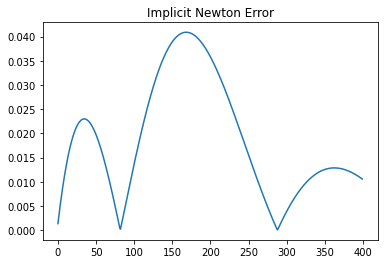

In [13]:
plt.plot(error_part2)
plt.title("Implicit Newton Error")

part2_error_squared = np.sum(np.square(error_part2))
rmsd_part2 = sqrt((part2_error_squared/iterations))

print("RMSD Implicit Newton = ",rmsd_part2)

In [39]:
time_step = 0.1
tn = 0
yn = 6
yn_prime = 5
iterations = 40
results = np.zeros((iterations,4))
anal_results = np.zeros(iterations)

time2 = np.arange (0.0, (time_step*iterations), time_step)

error_part1 = np.zeros(iterations)
for i in range(iterations):
  anal_results[i] = part1_analytical(tn)

  results[i,:] = np.array([tn, yn, yn_prime, i])

  yn = yn + (yn_prime * time_step)
  yn_prime = yn_1_prime_func(tn, yn_prime, yn, time_step)

  error_part1[i] = abs(anal_results[i] - results[i,1])

  tn = tn + time_step
#print (" Time, yn, yn', iteration \n", results)


In [15]:
#print (results[:,1])

NameError: ignored

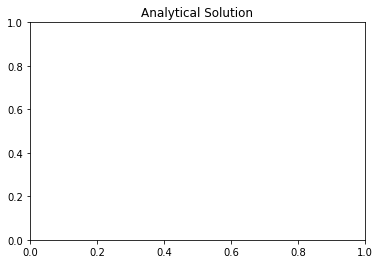

In [18]:
plt.plot(time2,results[:,1])
plt.title("Explicit Forward Euler")
#plt.plot(anal_results)
plt.grid(true)

RMSD Explicit Forward Euler =  0.0110636784449194


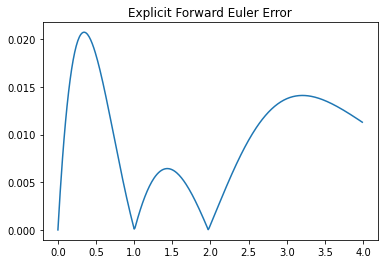

In [17]:
plt.plot(time2,error_part1)
plt.title("Explicit Forward Euler Error")
part1_error_squared = np.sum(np.square(error_part1))
rmsd_part1 = sqrt((part1_error_squared/iterations))

print("RMSD Explicit Forward Euler = ", rmsd_part1)

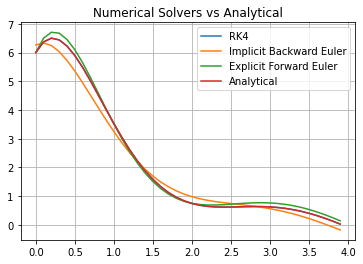

In [40]:
plt.plot(time,Y)
plt.plot(time1,back_results[:,0])
plt.plot(time2,results[:,1])
plt.plot(time1,anal_results)

plt.title("Numerical Solvers vs Analytical")
plt.legend(['RK4', 'Implicit Backward Euler', 'Explicit Forward Euler', 'Analytical'], loc = 'upper right')
plt.grid(True)